In [1]:
# Import Libraries

from statsbombpy import sb

## Math Operations
import numpy as np
import math

## Data Preprocessing
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import get_cmap
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import to_rgba
from matplotlib import rcParams

from matplotlib import cm
from colorspacious import cspace_converter

import seaborn as sns
import networkx as nx
from PIL import Image
from highlight_text import ax_text, fig_text
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch, add_image, FontManager, Sbopen
import mplsoccer
import socceraction
import socceraction.spadl as spadl
import matplotsoccer as mps
from svgpathtools import svg2paths
from svgpath2mpl import parse_path

## Requests and downloads
import tqdm
import requests
from urllib.request import urlopen

## Filter warning
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

from soccerplots.radar_chart import Radar

C:\Users\manci\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\manci\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\manci\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

In [3]:
players = pd.read_csv('players_stats.csv',header=1)

In [4]:
players

,Rk,Player,Pos,Squad,Age,Born,MP,Starts,Min,90s,...,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,-9999
0,1,Patrick van Aanholt,DF,nl Netherlands,30.0,1990.0,4.0,4.0,297.0,3.3,...,0.3,0.4,0.7,0.08,0.13,0.21,0.08,0.21,Matches,5f09991f
1,2,Francesco Acerbi,DF,it Italy,32.0,1988.0,3.0,1.0,232.0,2.6,...,0.0,0.3,0.3,0.02,0.12,0.14,0.02,0.14,Matches,b96b595c
2,3,Che Adams,FW,sct Scotland,24.0,1996.0,3.0,2.0,213.0,2.4,...,0.7,0.4,1.1,0.29,0.18,0.47,0.29,0.47,Matches,f2bf1b0f
3,4,Arijan Ademi,MF,mk North Macedonia,29.0,1991.0,3.0,3.0,251.0,2.8,...,0.2,0.0,0.3,0.08,0.01,0.09,0.08,0.09,Matches,ee926a02
4,5,Manuel Obafemi Akanji,DF,ch Switzerland,25.0,1995.0,5.0,5.0,510.0,5.7,...,0.4,0.0,0.4,0.07,0.01,0.08,0.07,0.08,Matches,89ac64a6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,486,Piotr Zieliński,MFFW,pl Poland,26.0,1994.0,3.0,3.0,264.0,2.9,...,0.3,0.4,0.6,0.10,0.13,0.22,0.10,0.22,Matches,a5296e55
486,487,Oleksandr Zinchenko,MFDF,ua Ukraine,24.0,1996.0,5.0,5.0,480.0,5.3,...,0.1,0.7,0.8,0.02,0.13,0.16,0.02,0.16,Matches,51cf8561
487,488,Roman Zobnin,MFFW,ru Russia,26.0,1994.0,3.0,3.0,242.0,2.7,...,0.1,0.2,0.3,0.04,0.06,0.10,0.04,0.10,Matches,0a215326
488,489,Steven Zuber,DFFW,ch Switzerland,29.0,1991.0,4.0,3.0,284.0,3.2,...,0.7,0.8,1.4,0.22,0.24,0.45,0.22,0.45,Matches,b6a6e0a7


In [5]:
mins_played = players[['Player', 'Min']]
mins_played = mins_played.rename(columns={'Player': 'player', 'Min': 'mins_played'})
mins_played

,player,mins_played
0,Patrick van Aanholt,297.0
1,Francesco Acerbi,232.0
2,Che Adams,213.0
3,Arijan Ademi,251.0
4,Manuel Obafemi Akanji,510.0
...,...,...
485,Piotr Zieliński,264.0
486,Oleksandr Zinchenko,480.0
487,Roman Zobnin,242.0
488,Steven Zuber,284.0


## DRIBBLES

In [6]:
grouped_events = sb.competition_events(
    country="Europe",
    division= "UEFA Euro",
    season="2020",
    split=True
)
dribbles = grouped_events["dribbles"]

In [7]:
dribbles.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'under_pressure', 'related_events',
       'match_id', 'dribble_outcome', 'possession_team_id', 'player_id',
       'dribble_overrun', 'dribble_nutmeg', 'out', 'dribble_no_touch'],
      dtype='object')

In [8]:
# Filtering only the columns I need
dribbles_filt = dribbles[['type', 'team', 'player', 'player_id', 'position', 'minute','under_pressure', 'dribble_outcome']]
dribbles_filt

,type,team,player,player_id,position,minute,under_pressure,dribble_outcome
0,Dribble,Finland,Jukka Raitala,15416,Right Wing Back,0,True,Complete
1,Dribble,Russia,Aleksandr Golovin,5177,Left Attacking Midfield,4,True,Complete
2,Dribble,Finland,Robin Lod,24321,Right Center Midfield,4,True,Incomplete
3,Dribble,Russia,Artem Dzyuba,5195,Center Forward,6,True,Incomplete
4,Dribble,Russia,Daler Kuzyaev,5179,Left Wing Back,7,True,Complete
...,...,...,...,...,...,...,...,...
1471,Dribble,Switzerland,Breel-Donald Embolo,5545,Left Center Forward,55,True,Complete
1472,Dribble,Wales,Daniel James,11252,Left Midfield,62,True,Complete
1473,Dribble,Wales,Ben Davies,3086,Left Back,70,True,Incomplete
1474,Dribble,Switzerland,Breel-Donald Embolo,5545,Left Center Forward,79,True,Complete


In [9]:
# boolean columns for working out probabilities

dribbles_filt['under_pressure'] = dribbles_filt['under_pressure'].astype(int)

dribbles_filt['Dribble_Complete'] = dribbles_filt['dribble_outcome'] == 'Complete'
dribbles_filt['Dribble_Complete']  = dribbles_filt['Dribble_Complete'].astype(int)

dribbles_filt['Dribble_Incomplete'] = dribbles_filt['dribble_outcome'] == 'Incomplete'
dribbles_filt['Dribble_Incomplete']  = dribbles_filt['Dribble_Incomplete'].astype(int)

dribbles_filt

,type,team,player,player_id,position,minute,under_pressure,dribble_outcome,Dribble_Complete,Dribble_Incomplete
0,Dribble,Finland,Jukka Raitala,15416,Right Wing Back,0,1,Complete,1,0
1,Dribble,Russia,Aleksandr Golovin,5177,Left Attacking Midfield,4,1,Complete,1,0
2,Dribble,Finland,Robin Lod,24321,Right Center Midfield,4,1,Incomplete,0,1
3,Dribble,Russia,Artem Dzyuba,5195,Center Forward,6,1,Incomplete,0,1
4,Dribble,Russia,Daler Kuzyaev,5179,Left Wing Back,7,1,Complete,1,0
...,...,...,...,...,...,...,...,...,...,...
1471,Dribble,Switzerland,Breel-Donald Embolo,5545,Left Center Forward,55,1,Complete,1,0
1472,Dribble,Wales,Daniel James,11252,Left Midfield,62,1,Complete,1,0
1473,Dribble,Wales,Ben Davies,3086,Left Back,70,1,Incomplete,0,1
1474,Dribble,Switzerland,Breel-Donald Embolo,5545,Left Center Forward,79,1,Complete,1,0


In [10]:
dribbles_filt_g = dribbles_filt.groupby('player')[['Dribble_Complete', 'Dribble_Incomplete']].sum()

In [11]:
dribbles_filt_g

,Dribble_Complete,Dribble_Incomplete
player,,
Aaron Ramsey,3,2
Adam Hložek,0,1
Adama Traoré Diarra,2,3
Adrien Rabiot,2,0
Albin Ekdal,0,3
...,...,...
Ádám Szalai,4,1
Álvaro Borja Morata Martín,3,6
İbrahim Halil Dervişoğlu,0,1


## PASSES

In [12]:
grouped_events = sb.competition_events(
    country="Europe",
    division= "UEFA Euro",
    season="2020",
    split=True
)
passes = grouped_events["passes"]

In [13]:
passes.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'pass_recipient', 'pass_length', 'pass_angle', 'pass_height',
       'pass_end_location', 'pass_body_part', 'pass_type',
       'possession_team_id', 'player_id', 'under_pressure', 'pass_aerial_won',
       'pass_outcome', 'pass_outswinging', 'pass_technique', 'pass_switch',
       'off_camera', 'pass_cross', 'pass_no_touch', 'pass_assisted_shot_id',
       'pass_shot_assist', 'out', 'pass_miscommunication', 'pass_through_ball',
       'pass_goal_assist', 'counterpress', 'pass_cut_back', 'pass_straight',
       'pass_inswinging', 'pass_deflected'],
      dtype='object')

In [14]:
# Filtering only the columns I need
passes_filt = passes[['type', 'pass_type','team', 'player', 'player_id', 'position', 'under_pressure','pass_length', 
                      'pass_outcome','pass_aerial_won', 'pass_cross', 'pass_shot_assist', 'pass_goal_assist',
                      'pass_cut_back']]
passes_filt

,type,pass_type,team,player,player_id,position,under_pressure,pass_length,pass_outcome,pass_aerial_won,pass_cross,pass_shot_assist,pass_goal_assist,pass_cut_back
0,Pass,Kick Off,Russia,Aleksey Miranchuk,6299,Right Attacking Midfield,NaN,22.357325,NaN,NaN,NaN,NaN,NaN,NaN
1,Pass,NaN,Russia,Igor Diveev,31917,Center Back,NaN,47.377000,NaN,NaN,NaN,NaN,NaN,NaN
2,Pass,NaN,Russia,Aleksandr Golovin,5177,Left Attacking Midfield,True,15.487091,NaN,True,NaN,NaN,NaN,NaN
3,Pass,NaN,Russia,Daler Kuzyaev,5179,Left Wing Back,NaN,13.417153,NaN,NaN,NaN,NaN,NaN,NaN
4,Pass,NaN,Russia,Artem Dzyuba,5195,Center Forward,NaN,21.883327,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54815,Pass,NaN,Switzerland,Fabian Lukas Schär,5537,Center Back,True,25.402560,NaN,NaN,NaN,NaN,NaN,NaN
54816,Pass,NaN,Switzerland,Yann Sommer,5550,Goalkeeper,NaN,8.926926,NaN,NaN,NaN,NaN,NaN,NaN
54817,Pass,NaN,Switzerland,Manuel Obafemi Akanji,5549,Left Center Back,NaN,47.765470,Incomplete,NaN,NaN,NaN,NaN,NaN
54818,Pass,Recovery,Wales,Kieffer Roberto Francisco Moore,3853,Center Forward,True,6.946222,NaN,True,NaN,NaN,NaN,NaN


In [15]:
# boolean columns for working out probabilities
passes_filt['under_pressure'] = passes_filt['under_pressure'].fillna(0)
passes_filt['under_pressure'] = passes_filt['under_pressure'].astype(int)

passes_filt['pass_outcome'] = passes_filt['pass_outcome'].fillna(0)
passes_filt['Pass_Incomplete'] = passes_filt['pass_outcome'] == 'Incomplete'
passes_filt['Pass_Incomplete'] = passes_filt['Pass_Incomplete'].astype(int)

passes_filt['pass_aerial_won'] = passes_filt['pass_aerial_won'].fillna(0)
passes_filt['pass_aerial_won'] = passes_filt['pass_aerial_won'].astype(int)

passes_filt['pass_cross'] = passes_filt['pass_cross'].fillna(0)
passes_filt['pass_cross'] = passes_filt['pass_cross'].astype(int)

passes_filt['pass_shot_assist'] = passes_filt['pass_shot_assist'].fillna(0)
passes_filt['pass_shot_assist'] = passes_filt['pass_shot_assist'].astype(int)

passes_filt['pass_goal_assist'] = passes_filt['pass_goal_assist'].fillna(0)
passes_filt['pass_goal_assist'] = passes_filt['pass_goal_assist'].astype(int)

passes_filt['pass_cut_back'] = passes_filt['pass_cut_back'].fillna(0)
passes_filt['pass_cut_back'] = passes_filt['pass_cut_back'].astype(int)

passes_filt

,type,pass_type,team,player,player_id,position,under_pressure,pass_length,pass_outcome,pass_aerial_won,pass_cross,pass_shot_assist,pass_goal_assist,pass_cut_back,Pass_Incomplete
0,Pass,Kick Off,Russia,Aleksey Miranchuk,6299,Right Attacking Midfield,0,22.357325,0,0,0,0,0,0,0
1,Pass,NaN,Russia,Igor Diveev,31917,Center Back,0,47.377000,0,0,0,0,0,0,0
2,Pass,NaN,Russia,Aleksandr Golovin,5177,Left Attacking Midfield,1,15.487091,0,1,0,0,0,0,0
3,Pass,NaN,Russia,Daler Kuzyaev,5179,Left Wing Back,0,13.417153,0,0,0,0,0,0,0
4,Pass,NaN,Russia,Artem Dzyuba,5195,Center Forward,0,21.883327,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54815,Pass,NaN,Switzerland,Fabian Lukas Schär,5537,Center Back,1,25.402560,0,0,0,0,0,0,0
54816,Pass,NaN,Switzerland,Yann Sommer,5550,Goalkeeper,0,8.926926,0,0,0,0,0,0,0
54817,Pass,NaN,Switzerland,Manuel Obafemi Akanji,5549,Left Center Back,0,47.765470,Incomplete,0,0,0,0,0,1
54818,Pass,Recovery,Wales,Kieffer Roberto Francisco Moore,3853,Center Forward,1,6.946222,0,1,0,0,0,0,0


In [16]:
passes_filt_g = passes_filt.groupby('player')[['pass_outcome', 'pass_cross', 'pass_shot_assist', 'pass_cut_back', 'Pass_Incomplete']].sum()
passes_filt_g

,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete
player,,,,
Aaron Ramsey,6,4,1,33
Adam Hložek,3,1,0,7
Adama Traoré Diarra,2,0,0,2
Admir Mehmedi,0,0,0,5
Adrien Rabiot,4,1,1,25
...,...,...,...,...
İbrahim Halil Dervişoğlu,0,0,0,2
İlkay Gündoğan,0,0,0,9
İrfan Can Kahveci,3,4,0,11


## INTERCEPTIONS

In [17]:
grouped_events = sb.competition_events(
    country="Europe",
    division= "UEFA Euro",
    season="2020",
    split=True
)
interceptions = grouped_events["interceptions"]

In [18]:
interceptions.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'under_pressure', 'counterpress',
       'related_events', 'match_id', 'interception_outcome',
       'possession_team_id', 'player_id', 'off_camera'],
      dtype='object')

In [19]:
# Filtering only the columns I need
interceptions_filt = interceptions[['type', 'team', 'player', 'player_id', 'position', 'under_pressure','interception_outcome']]
interceptions_filt

,type,team,player,player_id,position,under_pressure,interception_outcome
0,Interception,Finland,"Daniel O""Shaughnessy",38196,Left Center Back,True,Lost In Play
1,Interception,Finland,Jukka Raitala,15416,Right Wing Back,True,Won
2,Interception,Finland,Joona Toivio,26939,Right Center Back,NaN,Success In Play
3,Interception,Finland,Rasmus Schüller,12807,Center Defensive Midfield,NaN,Success In Play
4,Interception,Finland,"Daniel O""Shaughnessy",38196,Left Center Back,NaN,Lost In Play
...,...,...,...,...,...,...,...
1455,Interception,Switzerland,Nico Elvedi,8814,Right Center Back,NaN,Lost In Play
1456,Interception,Switzerland,Nico Elvedi,8814,Right Center Back,NaN,Won
1457,Interception,Wales,Joe Allen,10931,Center Defensive Midfield,NaN,Lost Out
1458,Interception,Switzerland,Granit Xhaka,3500,Left Defensive Midfield,NaN,Won


In [20]:
# boolean columns for working out probabilities
interceptions_filt['under_pressure'] = interceptions_filt['under_pressure'].fillna(0)
interceptions_filt['under_pressure'] = interceptions_filt['under_pressure'].astype(int)

interceptions_filt['interception_won'] = interceptions_filt['interception_outcome'] == 'Won'
interceptions_filt['interception_won']  = interceptions_filt['interception_won'].astype(int)

interceptions_filt['interception_lost'] = interceptions_filt['interception_outcome'] == 'Lost'
interceptions_filt['interception_lost']  = interceptions_filt['interception_lost'].astype(int)

interceptions_filt

,type,team,player,player_id,position,under_pressure,interception_outcome,interception_won,interception_lost
0,Interception,Finland,"Daniel O""Shaughnessy",38196,Left Center Back,1,Lost In Play,0,0
1,Interception,Finland,Jukka Raitala,15416,Right Wing Back,1,Won,1,0
2,Interception,Finland,Joona Toivio,26939,Right Center Back,0,Success In Play,0,0
3,Interception,Finland,Rasmus Schüller,12807,Center Defensive Midfield,0,Success In Play,0,0
4,Interception,Finland,"Daniel O""Shaughnessy",38196,Left Center Back,0,Lost In Play,0,0
...,...,...,...,...,...,...,...,...,...
1455,Interception,Switzerland,Nico Elvedi,8814,Right Center Back,0,Lost In Play,0,0
1456,Interception,Switzerland,Nico Elvedi,8814,Right Center Back,0,Won,1,0
1457,Interception,Wales,Joe Allen,10931,Center Defensive Midfield,0,Lost Out,0,0
1458,Interception,Switzerland,Granit Xhaka,3500,Left Defensive Midfield,0,Won,1,0


In [21]:
interceptions_filt_g = interceptions_filt.groupby('player')[['interception_won', 'interception_lost']].sum()
interceptions_filt_g

,interception_won,interception_lost
player,,
Aaron Ramsey,4,0
Admir Mehmedi,1,0
Adrien Rabiot,5,0
Albin Ekdal,3,0
Aleksandar Dragović,3,0
...,...,...
İbrahim Halil Dervişoğlu,1,0
İlkay Gündoğan,1,0
İrfan Can Kahveci,1,0


## DUELS

In [22]:
grouped_events = sb.competition_events(
    country="Europe",
    division= "UEFA Euro",
    season="2020",
    split=True
)
duels = grouped_events["duels"]

In [23]:
duels.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'under_pressure', 'related_events',
       'match_id', 'duel_type', 'possession_team_id', 'player_id',
       'counterpress', 'duel_outcome', 'off_camera'],
      dtype='object')

In [24]:
# Filtering only the columns I need
duels_filt = duels[['type', 'team', 'player', 'player_id', 'position', 'under_pressure','duel_type', 'duel_outcome']]
duels_filt

,type,team,player,player_id,position,under_pressure,duel_type,duel_outcome
0,Duel,Finland,Rasmus Schüller,12807,Center Defensive Midfield,True,Aerial Lost,NaN
1,Duel,Finland,Jukka Raitala,15416,Right Wing Back,True,Tackle,Success In Play
2,Duel,Russia,Artem Dzyuba,5195,Center Forward,True,Aerial Lost,NaN
3,Duel,Finland,Joona Toivio,26939,Right Center Back,True,Aerial Lost,NaN
4,Duel,Finland,"Daniel O""Shaughnessy",38196,Left Center Back,True,Aerial Lost,NaN
...,...,...,...,...,...,...,...,...
3350,Duel,Switzerland,Kevin Mbabu,16027,Right Wing Back,True,Tackle,Won
3351,Duel,Switzerland,Nico Elvedi,8814,Right Center Back,True,Aerial Lost,NaN
3352,Duel,Switzerland,Breel-Donald Embolo,5545,Left Center Forward,True,Aerial Lost,NaN
3353,Duel,Switzerland,Fabian Lukas Schär,5537,Center Back,True,Aerial Lost,NaN


In [25]:
duels_filt.duel_outcome.unique()

array([nan, 'Success In Play', 'Won', 'Success Out', 'Lost Out',
       'Lost In Play'], dtype=object)

In [26]:
# boolean columns for working out probabilities
duels_filt['under_pressure'] = duels_filt['under_pressure'].fillna(0)
duels_filt['under_pressure'] = duels_filt['under_pressure'].astype(int)

duels_filt['Tackle'] = duels_filt['duel_type'] == 'Tackle'
duels_filt['Tackle'] = duels_filt['Tackle'].astype(int)

duels_filt['Aerial_Lost'] = duels_filt['duel_type'] != 'Tackle'
duels_filt['Aerial_Lost'] = duels_filt['Aerial_Lost'].astype(int)

duels_filt['duels_won'] = duels_filt['duel_outcome'] == 'Won'
duels_filt['duels_won']  = duels_filt['duels_won'].astype(int)

duels_filt['duels_lost'] = duels_filt['duel_outcome'] == 'Lost'
duels_filt['duels_lost']  = duels_filt['duels_lost'].astype(int)

duels_filt

,type,team,player,player_id,position,under_pressure,duel_type,duel_outcome,Tackle,Aerial_Lost,duels_won,duels_lost
0,Duel,Finland,Rasmus Schüller,12807,Center Defensive Midfield,1,Aerial Lost,NaN,0,1,0,0
1,Duel,Finland,Jukka Raitala,15416,Right Wing Back,1,Tackle,Success In Play,1,0,0,0
2,Duel,Russia,Artem Dzyuba,5195,Center Forward,1,Aerial Lost,NaN,0,1,0,0
3,Duel,Finland,Joona Toivio,26939,Right Center Back,1,Aerial Lost,NaN,0,1,0,0
4,Duel,Finland,"Daniel O""Shaughnessy",38196,Left Center Back,1,Aerial Lost,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3350,Duel,Switzerland,Kevin Mbabu,16027,Right Wing Back,1,Tackle,Won,1,0,1,0
3351,Duel,Switzerland,Nico Elvedi,8814,Right Center Back,1,Aerial Lost,NaN,0,1,0,0
3352,Duel,Switzerland,Breel-Donald Embolo,5545,Left Center Forward,1,Aerial Lost,NaN,0,1,0,0
3353,Duel,Switzerland,Fabian Lukas Schär,5537,Center Back,1,Aerial Lost,NaN,0,1,0,0


In [27]:
duels_filt_g = duels_filt.groupby('player')[['Tackle', 'Aerial_Lost', 'duels_won', 'duels_lost']].sum()
duels_filt_g

,Tackle,Aerial_Lost,duels_won,duels_lost
player,,,,
Aaron Ramsey,7,8,1,0
Adam Hložek,0,2,0,0
Admir Mehmedi,2,0,0,0
Adrien Rabiot,8,2,1,0
Albin Ekdal,9,4,2,0
...,...,...,...,...
İbrahim Halil Dervişoğlu,0,3,0,0
İlkay Gündoğan,4,1,1,0
İrfan Can Kahveci,2,1,1,0


## SHOTS

In [28]:
grouped_events = sb.competition_events(
    country="Europe",
    division= "UEFA Euro",
    season="2020",
    split=True
)
shots = grouped_events["shots"]

In [29]:
shots.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_statsbomb_xg', 'shot_end_location', 'shot_outcome', 'shot_type',
       'shot_body_part', 'shot_technique', 'shot_freeze_frame',
       'possession_team_id', 'player_id', 'shot_key_pass_id',
       'shot_first_time', 'under_pressure', 'shot_aerial_won',
       'shot_one_on_one', 'shot_deflected', 'out', 'shot_saved_off_target',
       'shot_saved_to_post', 'shot_open_goal', 'shot_follows_dribble',
       'shot_redirect', 'off_camera'],
      dtype='object')

In [30]:
# Filtering only the columns I need
shots_filt = shots[['type', 'team', 'player', 'player_id', 'position', 'shot_statsbomb_xg', 'shot_outcome','shot_type', 'shot_key_pass_id',
                   'under_pressure']]
shots_filt

,type,team,player,player_id,position,shot_statsbomb_xg,shot_outcome,shot_type,shot_key_pass_id,under_pressure
0,Shot,Russia,Magomed Ozdoev,20845,Right Defensive Midfield,0.036601,Blocked,Open Play,NaN,NaN
1,Shot,Russia,Magomed Ozdoev,20845,Right Defensive Midfield,0.234583,Off T,Open Play,5d91cd90-16fa-45df-83e6-cd41dd7eba32,NaN
2,Shot,Finland,Joel Pohjanpalo,9725,Left Center Forward,0.280135,Blocked,Open Play,8c91e4ea-c7ec-445c-b7da-1e886a87a594,NaN
3,Shot,Finland,Joona Toivio,26939,Right Center Back,0.014893,Off T,Open Play,e8a6376e-ba9d-49d6-92cf-5b4fb378b216,True
4,Shot,Russia,Artem Dzyuba,5195,Center Forward,0.133869,Blocked,Open Play,8381fe0f-fd55-4d2a-84f4-9749d112c66d,True
...,...,...,...,...,...,...,...,...,...,...
1284,Shot,Wales,Ben Davies,3086,Left Back,0.042494,Off T,Open Play,b6cdf76a-57e4-49c3-b3b5-3d6ffe67ae81,NaN
1285,Shot,Switzerland,Denis Lemi Zakaria Lako Lado,5538,Center Attacking Midfield,0.024351,Blocked,Open Play,73b703c6-152b-4978-92bb-10f16fe952a0,NaN
1286,Shot,Wales,Joseff Morrell,22074,Right Center Midfield,0.020736,Blocked,Open Play,NaN,True
1287,Shot,Wales,Gareth Frank Bale,6399,Left Midfield,0.051522,Blocked,Open Play,90593593-c733-4907-9c3e-ebbd2612a545,True


In [31]:
# boolean columns for working out probabilities

shots_filt['goal'] = shots_filt['shot_outcome'] == 'Goal'
shots_filt['goal'] = shots_filt['goal'].astype(int)

shots_filt['shot_key_pass_id'] = shots_filt['shot_key_pass_id'].fillna(0)
shots_filt['key_pass'] = shots_filt['shot_key_pass_id'] != 0
shots_filt['key_pass']  = shots_filt['key_pass'] .astype(int)

shots_filt['shot_statsbomb_xg']  =  shots_filt['shot_statsbomb_xg'].round(2)

shots_filt

,type,team,player,player_id,position,shot_statsbomb_xg,shot_outcome,shot_type,shot_key_pass_id,under_pressure,goal,key_pass
0,Shot,Russia,Magomed Ozdoev,20845,Right Defensive Midfield,0.04,Blocked,Open Play,0,NaN,0,0
1,Shot,Russia,Magomed Ozdoev,20845,Right Defensive Midfield,0.23,Off T,Open Play,5d91cd90-16fa-45df-83e6-cd41dd7eba32,NaN,0,1
2,Shot,Finland,Joel Pohjanpalo,9725,Left Center Forward,0.28,Blocked,Open Play,8c91e4ea-c7ec-445c-b7da-1e886a87a594,NaN,0,1
3,Shot,Finland,Joona Toivio,26939,Right Center Back,0.01,Off T,Open Play,e8a6376e-ba9d-49d6-92cf-5b4fb378b216,True,0,1
4,Shot,Russia,Artem Dzyuba,5195,Center Forward,0.13,Blocked,Open Play,8381fe0f-fd55-4d2a-84f4-9749d112c66d,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1284,Shot,Wales,Ben Davies,3086,Left Back,0.04,Off T,Open Play,b6cdf76a-57e4-49c3-b3b5-3d6ffe67ae81,NaN,0,1
1285,Shot,Switzerland,Denis Lemi Zakaria Lako Lado,5538,Center Attacking Midfield,0.02,Blocked,Open Play,73b703c6-152b-4978-92bb-10f16fe952a0,NaN,0,1
1286,Shot,Wales,Joseff Morrell,22074,Right Center Midfield,0.02,Blocked,Open Play,0,True,0,0
1287,Shot,Wales,Gareth Frank Bale,6399,Left Midfield,0.05,Blocked,Open Play,90593593-c733-4907-9c3e-ebbd2612a545,True,0,1


In [32]:
shots_filt_g = shots_filt.groupby('player')[['shot_statsbomb_xg', 'goal', 'key_pass']].sum()
shots_filt_g

,shot_statsbomb_xg,goal,key_pass
player,,,
Aaron Ramsey,1.64,1,5
Adam Hložek,0.09,0,1
Admir Mehmedi,0.81,1,1
Adrien Rabiot,0.23,0,3
Albin Ekdal,0.05,0,0
...,...,...,...
Ádám Szalai,0.31,1,4
Álvaro Borja Morata Martín,4.84,3,12
İbrahim Halil Dervişoğlu,0.04,0,1


## Data pre-proccessing

In [33]:
players_id = passes[['player', 'player_id']]
players_id

,player,player_id
0,Aleksey Miranchuk,6299
1,Igor Diveev,31917
2,Aleksandr Golovin,5177
3,Daler Kuzyaev,5179
4,Artem Dzyuba,5195
...,...,...
54815,Fabian Lukas Schär,5537
54816,Yann Sommer,5550
54817,Manuel Obafemi Akanji,5549
54818,Kieffer Roberto Francisco Moore,3853


In [34]:
players_id = players_id.drop_duplicates(subset = "player_id").reset_index()
players_id

,index,player,player_id
0,0,Aleksey Miranchuk,6299
1,1,Igor Diveev,31917
2,2,Aleksandr Golovin,5177
3,3,Daler Kuzyaev,5179
4,4,Artem Dzyuba,5195
...,...,...,...
480,52782,Andrey Semenov,34588
481,52783,Anton Shunin,38119
482,52795,Timothy Castagne,6989
483,52837,Yuri Zhirkov,5193


In [35]:
stats1 = mins_played.merge(players_id, left_on = 'player', right_on = 'player', how = 'right')
stats2 = stats1.merge(passes_filt_g, left_on = 'player', right_on = 'player', how = 'left')
stats3 = stats2.merge(duels_filt_g, left_on = 'player', right_on = 'player', how = 'left')
stats4 = stats3.merge(dribbles_filt_g, left_on = 'player', right_on = 'player', how = 'left')
stats5 = stats4.merge(shots_filt_g, left_on = 'player', right_on = 'player', how = 'left')
players_stats = stats5.merge(interceptions_filt_g, left_on = 'player', right_on = 'player', how = 'left')
players_stats

,player,mins_played,index,player_id,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete,Tackle,Aerial_Lost,duels_won,duels_lost,Dribble_Complete,Dribble_Incomplete,shot_statsbomb_xg,goal,key_pass,interception_won,interception_lost
0,Aleksey Miranchuk,172.0,0,6299,1,4,0,8,2.0,4.0,0.0,0.0,2.0,4.0,0.17,1.0,1.0,NaN,NaN
1,Igor Diveev,225.0,1,31917,0,0,0,19,6.0,4.0,2.0,0.0,NaN,NaN,0.03,0.0,1.0,2.0,0.0
2,Aleksandr Golovin,270.0,2,5177,12,3,1,25,5.0,2.0,3.0,0.0,5.0,1.0,0.30,0.0,3.0,1.0,0.0
3,Daler Kuzyaev,185.0,3,5179,7,1,1,15,5.0,2.0,1.0,0.0,6.0,2.0,0.13,0.0,1.0,0.0,0.0
4,Artem Dzyuba,264.0,4,5195,1,4,0,30,0.0,27.0,0.0,0.0,1.0,3.0,1.02,1.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Andrey Semenov,NaN,52782,34588,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
481,Anton Shunin,90.0,52783,38119,0,0,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,Timothy Castagne,26.0,52795,6989,0,0,0,1,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,Yuri Zhirkov,42.0,52837,5193,1,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
players_stats = players_stats.drop('index', axis=1)
players_stats

,player,mins_played,player_id,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete,Tackle,Aerial_Lost,duels_won,duels_lost,Dribble_Complete,Dribble_Incomplete,shot_statsbomb_xg,goal,key_pass,interception_won,interception_lost
0,Aleksey Miranchuk,172.0,6299,1,4,0,8,2.0,4.0,0.0,0.0,2.0,4.0,0.17,1.0,1.0,NaN,NaN
1,Igor Diveev,225.0,31917,0,0,0,19,6.0,4.0,2.0,0.0,NaN,NaN,0.03,0.0,1.0,2.0,0.0
2,Aleksandr Golovin,270.0,5177,12,3,1,25,5.0,2.0,3.0,0.0,5.0,1.0,0.30,0.0,3.0,1.0,0.0
3,Daler Kuzyaev,185.0,5179,7,1,1,15,5.0,2.0,1.0,0.0,6.0,2.0,0.13,0.0,1.0,0.0,0.0
4,Artem Dzyuba,264.0,5195,1,4,0,30,0.0,27.0,0.0,0.0,1.0,3.0,1.02,1.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Andrey Semenov,NaN,34588,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
481,Anton Shunin,90.0,38119,0,0,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,Timothy Castagne,26.0,6989,0,0,0,1,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,Yuri Zhirkov,42.0,5193,1,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
players_stats

,player,mins_played,player_id,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete,Tackle,Aerial_Lost,duels_won,duels_lost,Dribble_Complete,Dribble_Incomplete,shot_statsbomb_xg,goal,key_pass,interception_won,interception_lost
0,Aleksey Miranchuk,172.0,6299,1,4,0,8,2.0,4.0,0.0,0.0,2.0,4.0,0.17,1.0,1.0,NaN,NaN
1,Igor Diveev,225.0,31917,0,0,0,19,6.0,4.0,2.0,0.0,NaN,NaN,0.03,0.0,1.0,2.0,0.0
2,Aleksandr Golovin,270.0,5177,12,3,1,25,5.0,2.0,3.0,0.0,5.0,1.0,0.30,0.0,3.0,1.0,0.0
3,Daler Kuzyaev,185.0,5179,7,1,1,15,5.0,2.0,1.0,0.0,6.0,2.0,0.13,0.0,1.0,0.0,0.0
4,Artem Dzyuba,264.0,5195,1,4,0,30,0.0,27.0,0.0,0.0,1.0,3.0,1.02,1.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Andrey Semenov,NaN,34588,0,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
481,Anton Shunin,90.0,38119,0,0,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,Timothy Castagne,26.0,6989,0,0,0,1,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,Yuri Zhirkov,42.0,5193,1,0,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
players_stats.isna().sum()

player                  0
mins_played             5
player_id               0
pass_cross              0
pass_shot_assist        0
pass_cut_back           0
Pass_Incomplete         0
Tackle                 81
Aerial_Lost            81
duels_won              81
duels_lost             81
Dribble_Complete      154
Dribble_Incomplete    154
shot_statsbomb_xg     156
goal                  156
key_pass              156
interception_won      162
interception_lost     162
dtype: int64

In [39]:
# consider only players with more then 270 mins played

players_stats = players_stats[players_stats.mins_played > 270.].reset_index()
players_stats

,index,player,mins_played,player_id,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete,Tackle,Aerial_Lost,duels_won,duels_lost,Dribble_Complete,Dribble_Incomplete,shot_statsbomb_xg,goal,key_pass,interception_won,interception_lost
0,30,Xherdan Shaqiri,366.0,3533,8,9,0,40,3.0,0.0,0.0,0.0,3.0,3.0,1.39,3.0,8.0,2.0,0.0
1,31,Manuel Obafemi Akanji,510.0,5549,0,1,0,19,13.0,6.0,4.0,0.0,2.0,0.0,1.93,1.0,5.0,1.0,0.0
2,32,Granit Xhaka,390.0,3500,2,4,0,26,10.0,6.0,2.0,0.0,3.0,1.0,0.27,0.0,1.0,3.0,0.0
3,33,Steven Zuber,284.0,5548,11,2,2,28,4.0,2.0,0.0,0.0,3.0,3.0,0.66,0.0,5.0,0.0,0.0
4,34,Ricardo Iván Rodríguez Araya,476.0,5544,10,10,0,53,13.0,7.0,4.0,0.0,4.0,0.0,0.78,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,386,Joseff Morrell,298.0,22074,0,3,0,11,6.0,3.0,3.0,0.0,NaN,NaN,0.02,0.0,0.0,2.0,0.0
151,387,Connor Roberts,309.0,4774,4,1,0,21,2.0,3.0,1.0,0.0,1.0,0.0,0.14,1.0,1.0,0.0,0.0
152,388,Gareth Frank Bale,355.0,6399,12,4,3,28,1.0,8.0,0.0,0.0,9.0,2.0,1.80,0.0,9.0,1.0,0.0
153,389,Danny Ward,360.0,9914,0,0,0,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
players_stats.isna().sum()

index                  0
player                 0
mins_played            0
player_id              0
pass_cross             0
pass_shot_assist       0
pass_cut_back          0
Pass_Incomplete        0
Tackle                15
Aerial_Lost           15
duels_won             15
duels_lost            15
Dribble_Complete      23
Dribble_Incomplete    23
shot_statsbomb_xg     28
goal                  28
key_pass              28
interception_won      22
interception_lost     22
dtype: int64

In [41]:
players_stats['Tackle'].fillna(int(players_stats['Tackle'].mean()), inplace=True)
players_stats['Aerial_Lost'].fillna(int(players_stats['Aerial_Lost'].mean()), inplace=True)
players_stats['duels_won'].fillna(int(players_stats['duels_won'].mean()), inplace=True)
players_stats['duels_lost'].fillna(int(players_stats['duels_lost'].mean()), inplace=True)
players_stats['Dribble_Complete'].fillna(int(players_stats['Dribble_Complete'].mean()), inplace=True)
players_stats['Dribble_Incomplete'].fillna(int(players_stats['Dribble_Incomplete'].mean()), inplace=True)
players_stats['shot_statsbomb_xg'].fillna(int(players_stats['shot_statsbomb_xg'].mean()), inplace=True)
players_stats['goal'].fillna(int(players_stats['goal'].mean()), inplace=True)
players_stats['key_pass'].fillna(int(players_stats['key_pass'].mean()), inplace=True)
players_stats['interception_won'].fillna(int(players_stats['interception_won'].mean()), inplace=True)
players_stats['interception_lost'].fillna(int(players_stats['interception_lost'].mean()), inplace=True)
players_stats.isna().sum()

index                 0
player                0
mins_played           0
player_id             0
pass_cross            0
pass_shot_assist      0
pass_cut_back         0
Pass_Incomplete       0
Tackle                0
Aerial_Lost           0
duels_won             0
duels_lost            0
Dribble_Complete      0
Dribble_Incomplete    0
shot_statsbomb_xg     0
goal                  0
key_pass              0
interception_won      0
interception_lost     0
dtype: int64

In [42]:
players_stats.drop('index', axis=1)

,player,mins_played,player_id,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete,Tackle,Aerial_Lost,duels_won,duels_lost,Dribble_Complete,Dribble_Incomplete,shot_statsbomb_xg,goal,key_pass,interception_won,interception_lost
0,Xherdan Shaqiri,366.0,3533,8,9,0,40,3.0,0.0,0.0,0.0,3.0,3.0,1.39,3.0,8.0,2.0,0.0
1,Manuel Obafemi Akanji,510.0,5549,0,1,0,19,13.0,6.0,4.0,0.0,2.0,0.0,1.93,1.0,5.0,1.0,0.0
2,Granit Xhaka,390.0,3500,2,4,0,26,10.0,6.0,2.0,0.0,3.0,1.0,0.27,0.0,1.0,3.0,0.0
3,Steven Zuber,284.0,5548,11,2,2,28,4.0,2.0,0.0,0.0,3.0,3.0,0.66,0.0,5.0,0.0,0.0
4,Ricardo Iván Rodríguez Araya,476.0,5544,10,10,0,53,13.0,7.0,4.0,0.0,4.0,0.0,0.78,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Joseff Morrell,298.0,22074,0,3,0,11,6.0,3.0,3.0,0.0,3.0,2.0,0.02,0.0,0.0,2.0,0.0
151,Connor Roberts,309.0,4774,4,1,0,21,2.0,3.0,1.0,0.0,1.0,0.0,0.14,1.0,1.0,0.0,0.0
152,Gareth Frank Bale,355.0,6399,12,4,3,28,1.0,8.0,0.0,0.0,9.0,2.0,1.80,0.0,9.0,1.0,0.0
153,Danny Ward,360.0,9914,0,0,0,36,6.0,6.0,1.0,0.0,3.0,2.0,0.00,0.0,4.0,2.0,0.0


In [43]:
# P90 normalization
kpi = players_stats.columns.to_list()

for m in kpi:
  if m not in ['player']:
    players_stats[m+'_p90'] = players_stats[m] / (players_stats.mins_played / 90.)

players_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   155 non-null    int64  
 1   player                  155 non-null    object 
 2   mins_played             155 non-null    float64
 3   player_id               155 non-null    int64  
 4   pass_cross              155 non-null    int32  
 5   pass_shot_assist        155 non-null    int32  
 6   pass_cut_back           155 non-null    int32  
 7   Pass_Incomplete         155 non-null    int32  
 8   Tackle                  155 non-null    float64
 9   Aerial_Lost             155 non-null    float64
 10  duels_won               155 non-null    float64
 11  duels_lost              155 non-null    float64
 12  Dribble_Complete        155 non-null    float64
 13  Dribble_Incomplete      155 non-null    float64
 14  shot_statsbomb_xg       155 non-null    fl

In [44]:
players_stats

,index,player,mins_played,player_id,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete,Tackle,Aerial_Lost,...,Aerial_Lost_p90,duels_won_p90,duels_lost_p90,Dribble_Complete_p90,Dribble_Incomplete_p90,shot_statsbomb_xg_p90,goal_p90,key_pass_p90,interception_won_p90,interception_lost_p90
0,30,Xherdan Shaqiri,366.0,3533,8,9,0,40,3.0,0.0,...,0.000000,0.000000,0.0,0.737705,0.737705,0.341803,0.737705,1.967213,0.491803,0.0
1,31,Manuel Obafemi Akanji,510.0,5549,0,1,0,19,13.0,6.0,...,1.058824,0.705882,0.0,0.352941,0.000000,0.340588,0.176471,0.882353,0.176471,0.0
2,32,Granit Xhaka,390.0,3500,2,4,0,26,10.0,6.0,...,1.384615,0.461538,0.0,0.692308,0.230769,0.062308,0.000000,0.230769,0.692308,0.0
3,33,Steven Zuber,284.0,5548,11,2,2,28,4.0,2.0,...,0.633803,0.000000,0.0,0.950704,0.950704,0.209155,0.000000,1.584507,0.000000,0.0
4,34,Ricardo Iván Rodríguez Araya,476.0,5544,10,10,0,53,13.0,7.0,...,1.323529,0.756303,0.0,0.756303,0.000000,0.147479,0.000000,0.378151,0.378151,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,386,Joseff Morrell,298.0,22074,0,3,0,11,6.0,3.0,...,0.906040,0.906040,0.0,0.906040,0.604027,0.006040,0.000000,0.000000,0.604027,0.0
151,387,Connor Roberts,309.0,4774,4,1,0,21,2.0,3.0,...,0.873786,0.291262,0.0,0.291262,0.000000,0.040777,0.291262,0.291262,0.000000,0.0
152,388,Gareth Frank Bale,355.0,6399,12,4,3,28,1.0,8.0,...,2.028169,0.000000,0.0,2.281690,0.507042,0.456338,0.000000,2.281690,0.253521,0.0
153,389,Danny Ward,360.0,9914,0,0,0,36,6.0,6.0,...,1.500000,0.250000,0.0,0.750000,0.500000,0.000000,0.000000,1.000000,0.500000,0.0


In [45]:
players_stats.columns

Index(['index', 'player', 'mins_played', 'player_id', 'pass_cross',
       'pass_shot_assist', 'pass_cut_back', 'Pass_Incomplete', 'Tackle',
       'Aerial_Lost', 'duels_won', 'duels_lost', 'Dribble_Complete',
       'Dribble_Incomplete', 'shot_statsbomb_xg', 'goal', 'key_pass',
       'interception_won', 'interception_lost', 'index_p90', 'mins_played_p90',
       'player_id_p90', 'pass_cross_p90', 'pass_shot_assist_p90',
       'pass_cut_back_p90', 'Pass_Incomplete_p90', 'Tackle_p90',
       'Aerial_Lost_p90', 'duels_won_p90', 'duels_lost_p90',
       'Dribble_Complete_p90', 'Dribble_Incomplete_p90',
       'shot_statsbomb_xg_p90', 'goal_p90', 'key_pass_p90',
       'interception_won_p90', 'interception_lost_p90'],
      dtype='object')

In [46]:
# percentile ranking

kpi_par = ['pass_cross_p90', 'pass_shot_assist_p90', 'pass_cut_back_p90', 
           'Pass_Incomplete_p90', 'duels_won_p90', 'Dribble_Complete_p90', 
           'shot_statsbomb_xg_p90', 'goal_p90', 'key_pass_p90', 'interception_won_p90']
kpi_par_rank = []
for m in kpi_par:
  m2 = m+'_rank'
  kpi_par_rank.append(m2)
  if m2 not in players_stats.columns:
    players_stats[m2] = 100*players_stats[m].rank(pct = True)

## Radar Chart

In [47]:
players_stats.describe()

,index,mins_played,player_id,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete,Tackle,Aerial_Lost,duels_won,...,pass_cross_p90_rank,pass_shot_assist_p90_rank,pass_cut_back_p90_rank,Pass_Incomplete_p90_rank,duels_won_p90_rank,Dribble_Complete_p90_rank,shot_statsbomb_xg_p90_rank,goal_p90_rank,key_pass_p90_rank,interception_won_p90_rank
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,180.167742,406.083871,8759.174194,4.070968,3.070968,0.322581,28.806452,6.387097,6.251613,1.503226,...,50.322581,50.322581,50.322581,50.322581,50.322581,50.322581,50.322581,50.322581,50.322581,50.322581
std,105.878932,104.102033,7044.939477,4.837770,2.976335,0.701904,13.040943,3.907015,4.838420,1.434157,...,28.408464,28.792897,20.730279,28.960158,28.738118,28.949120,28.874987,24.768807,28.951991,28.943307
min,30.000000,271.000000,2954.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,17.096774,11.612903,39.677419,0.645161,12.580645,4.516129,9.354839,32.580645,4.193548,5.161290
25%,93.500000,336.500000,4354.000000,0.000000,1.000000,0.000000,20.000000,4.000000,3.000000,1.000000,...,17.096774,25.483871,39.677419,25.483871,25.483871,25.322581,25.322581,32.580645,25.483871,25.483871
50%,154.000000,374.000000,5622.000000,2.000000,2.000000,0.000000,26.000000,6.000000,6.000000,1.000000,...,50.322581,50.322581,39.677419,50.645161,49.677419,50.322581,50.322581,32.580645,50.322581,50.000000
75%,259.500000,453.500000,8824.500000,7.000000,4.000000,0.000000,35.000000,9.000000,8.000000,2.000000,...,75.161290,75.322581,39.677419,75.161290,75.483871,75.161290,75.161290,75.161290,75.161290,75.161290
max,440.000000,718.000000,39136.000000,21.000000,13.000000,3.000000,81.000000,20.000000,37.000000,6.000000,...,99.677419,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [48]:
players_stats.columns

Index(['index', 'player', 'mins_played', 'player_id', 'pass_cross',
       'pass_shot_assist', 'pass_cut_back', 'Pass_Incomplete', 'Tackle',
       'Aerial_Lost', 'duels_won', 'duels_lost', 'Dribble_Complete',
       'Dribble_Incomplete', 'shot_statsbomb_xg', 'goal', 'key_pass',
       'interception_won', 'interception_lost', 'index_p90', 'mins_played_p90',
       'player_id_p90', 'pass_cross_p90', 'pass_shot_assist_p90',
       'pass_cut_back_p90', 'Pass_Incomplete_p90', 'Tackle_p90',
       'Aerial_Lost_p90', 'duels_won_p90', 'duels_lost_p90',
       'Dribble_Complete_p90', 'Dribble_Incomplete_p90',
       'shot_statsbomb_xg_p90', 'goal_p90', 'key_pass_p90',
       'interception_won_p90', 'interception_lost_p90', 'pass_cross_p90_rank',
       'pass_shot_assist_p90_rank', 'pass_cut_back_p90_rank',
       'Pass_Incomplete_p90_rank', 'duels_won_p90_rank',
       'Dribble_Complete_p90_rank', 'shot_statsbomb_xg_p90_rank',
       'goal_p90_rank', 'key_pass_p90_rank', 'interception_won_p90_

### Lorenzo Insigne

In [49]:
Insigne = players_stats[players_stats.player == 'Lorenzo Insigne']
Insigne

,index,player,mins_played,player_id,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete,Tackle,Aerial_Lost,...,pass_cross_p90_rank,pass_shot_assist_p90_rank,pass_cut_back_p90_rank,Pass_Incomplete_p90_rank,duels_won_p90_rank,Dribble_Complete_p90_rank,shot_statsbomb_xg_p90_rank,goal_p90_rank,key_pass_p90_rank,interception_won_p90_rank
27,77,Lorenzo Insigne,507.0,7037,15,13,0,64,4.0,7.0,...,90.322581,97.419355,39.677419,94.193548,12.580645,81.935484,76.129032,83.225806,90.967742,11.612903


In [50]:
Insigne.columns

Index(['index', 'player', 'mins_played', 'player_id', 'pass_cross',
       'pass_shot_assist', 'pass_cut_back', 'Pass_Incomplete', 'Tackle',
       'Aerial_Lost', 'duels_won', 'duels_lost', 'Dribble_Complete',
       'Dribble_Incomplete', 'shot_statsbomb_xg', 'goal', 'key_pass',
       'interception_won', 'interception_lost', 'index_p90', 'mins_played_p90',
       'player_id_p90', 'pass_cross_p90', 'pass_shot_assist_p90',
       'pass_cut_back_p90', 'Pass_Incomplete_p90', 'Tackle_p90',
       'Aerial_Lost_p90', 'duels_won_p90', 'duels_lost_p90',
       'Dribble_Complete_p90', 'Dribble_Incomplete_p90',
       'shot_statsbomb_xg_p90', 'goal_p90', 'key_pass_p90',
       'interception_won_p90', 'interception_lost_p90', 'pass_cross_p90_rank',
       'pass_shot_assist_p90_rank', 'pass_cut_back_p90_rank',
       'Pass_Incomplete_p90_rank', 'duels_won_p90_rank',
       'Dribble_Complete_p90_rank', 'shot_statsbomb_xg_p90_rank',
       'goal_p90_rank', 'key_pass_p90_rank', 'interception_won_p90_

In [51]:
players_stats.pass_cross_p90.min(), players_stats.pass_cross_p90.max()

(0.0, 4.0)

In [52]:
Insigne.interception_won_p90

27    0.177515
Name: interception_won_p90, dtype: float64

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


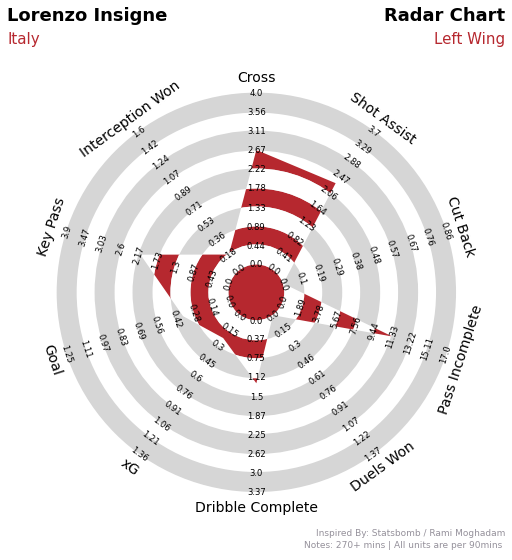

In [53]:
## parameter names
Insigne_params = ['Cross', 'Shot Assist', 'Cut Back', 
           'Pass Incomplete', 'Duels Won', 'Dribble Complete', 
           'xG', 'Goal', 'Key Pass', 'Interception Won']

## range values
Insigne_ranges = [(0, 4), (0, 3.7), (0.0, 0.86), (0.0, 17), (0.0, 1.37), 
          (0.0, 3.37), (0.0, 1.36), (0.0, 1.25), (0.0, 3.90), (0.0, 1.6)]
# Insigne_ranges_rank = [(0, 100), (0, 100), (0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100)]

## parameter value
Insigne_values = [2.66, 2.30, 0.00, 11.36, 0.00, 1.24, 0.23, 0.36, 2.13, 0.18]
# Insigne_values_rank = players_stats.loc[27, kpi_par_rank].values


## title values 
title = dict(
    title_name='Lorenzo Insigne',
    title_color='#000000',
    subtitle_name='Italy',
    subtitle_color='#B6282F',
    title_name_2='Radar Chart',    ## title on right side
    subtitle_name_2='Left Wing',    ## subtitle on right side
    subtitle_color_2='#B6282F',
    title_fontsize=18,
    subtitle_fontsize=15,
)

## endnote 
endnote = "Notes: 270+ mins | All units are per 90mins "

## instantiate object
radar = Radar(label_fontsize=14, range_fontsize=8.5)

## plot radar
fig, ax = radar.plot_radar(ranges=Insigne_ranges, params=Insigne_params, values=Insigne_values, 
                           radar_color=['#B6282F', '#FFFFFF'], title=title,
                           endnote=endnote,
                           filename="Insigne_radar.jpg")

#fig, ax = radar.plot_radar(ranges=Insigne_ranges_rank, params=Insigne_params, values=Insigne_values_rank, 
#                           radar_color=['#B6282F', '#FFFFFF'], title=title,
#                           endnote=endnote,
#                           filename="Insigne_radar.jpg")

### Raheem Sterling

In [54]:
Sterling = players_stats[players_stats.player == 'Raheem Sterling']
Sterling

,index,player,mins_played,player_id,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete,Tackle,Aerial_Lost,...,pass_cross_p90_rank,pass_shot_assist_p90_rank,pass_cut_back_p90_rank,Pass_Incomplete_p90_rank,duels_won_p90_rank,Dribble_Complete_p90_rank,shot_statsbomb_xg_p90_rank,goal_p90_rank,key_pass_p90_rank,interception_won_p90_rank
37,92,Raheem Sterling,639.0,3233,7,2,1,32,5.0,11.0,...,62.580645,39.354839,79.354839,27.096774,81.290323,99.354839,85.16129,87.096774,81.290323,64.516129


In [55]:
Sterling.columns

Index(['index', 'player', 'mins_played', 'player_id', 'pass_cross',
       'pass_shot_assist', 'pass_cut_back', 'Pass_Incomplete', 'Tackle',
       'Aerial_Lost', 'duels_won', 'duels_lost', 'Dribble_Complete',
       'Dribble_Incomplete', 'shot_statsbomb_xg', 'goal', 'key_pass',
       'interception_won', 'interception_lost', 'index_p90', 'mins_played_p90',
       'player_id_p90', 'pass_cross_p90', 'pass_shot_assist_p90',
       'pass_cut_back_p90', 'Pass_Incomplete_p90', 'Tackle_p90',
       'Aerial_Lost_p90', 'duels_won_p90', 'duels_lost_p90',
       'Dribble_Complete_p90', 'Dribble_Incomplete_p90',
       'shot_statsbomb_xg_p90', 'goal_p90', 'key_pass_p90',
       'interception_won_p90', 'interception_lost_p90', 'pass_cross_p90_rank',
       'pass_shot_assist_p90_rank', 'pass_cut_back_p90_rank',
       'Pass_Incomplete_p90_rank', 'duels_won_p90_rank',
       'Dribble_Complete_p90_rank', 'shot_statsbomb_xg_p90_rank',
       'goal_p90_rank', 'key_pass_p90_rank', 'interception_won_p90_

In [56]:
Sterling.interception_won_p90

37    0.56338
Name: interception_won_p90, dtype: float64

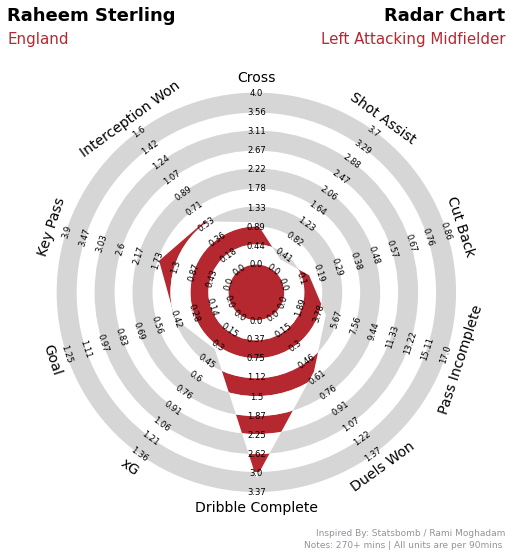

In [57]:
## parameter names
Sterling_params = ['Cross', 'Shot Assist', 'Cut Back', 
           'Pass Incomplete', 'Duels Won', 'Dribble Complete', 
           'xG', 'Goal', 'Key Pass', 'Interception Won']

## range values
Sterling_ranges = [(0, 4), (0, 3.7), (0.0, 0.86), (0.0, 17), (0.0, 1.37), (0.0, 3.37), (0.0, 1.36), (0.0, 1.25), (0.0, 3.90), (0.0, 1.6)]
# Sterling_ranges_rank = [(0, 100), (0, 100), (0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100), (0.0, 100)]

## parameter value
Sterling_values = [0.99, 0.28, 0.14, 4.50, 0.56, 3.10, 0.34, 0.42, 1.69, 0.56]
# Sterling_values_rank = players_stats.loc[37, kpi_par_rank].values


## title values 
title = dict(
    title_name='Raheem Sterling',
    title_color='#000000',
    subtitle_name='England',
    subtitle_color='#B6282F',
    title_name_2='Radar Chart',    ## title on right side
    subtitle_name_2='Left Attacking Midfielder',    ## subtitle on right side
    subtitle_color_2='#B6282F',
    title_fontsize=18,
    subtitle_fontsize=15,
)
## endnote 
endnote = "Notes: 270+ mins | All units are per 90mins "

## instantiate object
radar = Radar(label_fontsize=14, range_fontsize=8.5)

## plot radar
fig, ax = radar.plot_radar(ranges=Sterling_ranges, params=Sterling_params, values=Sterling_values, 
                           radar_color=['#B6282F', '#FFFFFF'], title=title,
                           endnote=endnote,
                           filename="Sterling_radar.jpg")

#fig, ax = radar.plot_radar(ranges=Sterling_ranges_rank, params=Sterling_params, values=Sterling_values_rank, 
#                           radar_color=['#B6282F', '#FFFFFF'], title=title,
#                           endnote=endnote,
#                           filename="Sterling_radar.jpg")

## Scatterplot xG vs Goal

In [128]:
players_stats

,index,player,mins_played,player_id,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete,Tackle,Aerial_Lost,...,pass_shot_assist_p90_rank,pass_cut_back_p90_rank,Pass_Incomplete_p90_rank,duels_won_p90_rank,Dribble_Complete_p90_rank,shot_statsbomb_xg_p90_rank,goal_p90_rank,key_pass_p90_rank,interception_won_p90_rank,mins_scaled
0,30,Xherdan Shaqiri,366.0,3533,8,9,0,40,3.0,0.0,...,96.129032,39.677419,88.387097,12.580645,59.354839,84.516129,96.129032,89.677419,54.193548,66.129754
1,31,Manuel Obafemi Akanji,510.0,5549,0,1,0,19,13.0,6.0,...,26.774194,39.677419,8.709677,86.774194,31.612903,83.870968,68.387097,55.483871,10.967742,120.894855
2,32,Granit Xhaka,390.0,3500,2,4,0,26,10.0,6.0,...,68.709677,39.677419,50.645161,69.677419,55.483871,52.903226,32.580645,12.580645,75.161290,75.257271
3,33,Steven Zuber,284.0,5548,11,2,2,28,4.0,2.0,...,52.258065,98.709677,82.580645,12.580645,72.903226,73.548387,32.580645,79.354839,5.161290,34.944072
4,34,Ricardo Iván Rodríguez Araya,476.0,5544,10,10,0,53,13.0,7.0,...,94.193548,39.677419,89.677419,88.387097,65.161290,64.516129,32.580645,27.096774,40.000000,107.964206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,386,Joseff Morrell,298.0,22074,0,3,0,11,6.0,3.0,...,66.451613,39.677419,7.741935,92.258065,70.967742,22.580645,32.580645,4.193548,69.354839,40.268456
151,387,Connor Roberts,309.0,4774,4,1,0,21,2.0,3.0,...,41.290323,39.677419,51.612903,60.000000,26.451613,47.096774,79.354839,22.580645,5.161290,44.451902
152,388,Gareth Frank Bale,355.0,6399,12,4,3,28,1.0,8.0,...,73.548387,99.354839,63.870968,12.580645,96.774194,90.967742,32.580645,92.903226,21.935484,61.946309
153,389,Danny Ward,360.0,9914,0,0,0,36,6.0,6.0,...,11.612903,39.677419,83.548387,49.677419,61.935484,9.354839,32.580645,65.483871,57.419355,63.847875


In [129]:
# Take the position for each player
positions = shots_filt[['player','position']]
positions = positions.drop_duplicates(subset ='player')
positions.reset_index()

,index,player,position
0,0,Magomed Ozdoev,Right Defensive Midfield
1,2,Joel Pohjanpalo,Left Center Forward
2,3,Joona Toivio,Right Center Back
3,4,Artem Dzyuba,Center Forward
4,5,Igor Diveev,Center Back
...,...,...,...
324,1244,Jakub Świerczok,Right Center Forward
325,1251,Leander Dendoncker,Right Defensive Midfield
326,1256,Yannick Ferreira Carrasco,Left Attacking Midfield
327,1262,Kevin Mbabu,Right Wing Back


In [130]:
# Merge player stats with player position
df = players_stats.merge(positions, left_on = 'player', right_on = 'player', how = 'left')
df

,index,player,mins_played,player_id,pass_cross,pass_shot_assist,pass_cut_back,Pass_Incomplete,Tackle,Aerial_Lost,...,pass_cut_back_p90_rank,Pass_Incomplete_p90_rank,duels_won_p90_rank,Dribble_Complete_p90_rank,shot_statsbomb_xg_p90_rank,goal_p90_rank,key_pass_p90_rank,interception_won_p90_rank,mins_scaled,position
0,30,Xherdan Shaqiri,366.0,3533,8,9,0,40,3.0,0.0,...,39.677419,88.387097,12.580645,59.354839,84.516129,96.129032,89.677419,54.193548,66.129754,Center Attacking Midfield
1,31,Manuel Obafemi Akanji,510.0,5549,0,1,0,19,13.0,6.0,...,39.677419,8.709677,86.774194,31.612903,83.870968,68.387097,55.483871,10.967742,120.894855,Center Back
2,32,Granit Xhaka,390.0,3500,2,4,0,26,10.0,6.0,...,39.677419,50.645161,69.677419,55.483871,52.903226,32.580645,12.580645,75.161290,75.257271,Left Defensive Midfield
3,33,Steven Zuber,284.0,5548,11,2,2,28,4.0,2.0,...,98.709677,82.580645,12.580645,72.903226,73.548387,32.580645,79.354839,5.161290,34.944072,Left Wing Back
4,34,Ricardo Iván Rodríguez Araya,476.0,5544,10,10,0,53,13.0,7.0,...,39.677419,89.677419,88.387097,65.161290,64.516129,32.580645,27.096774,40.000000,107.964206,Left Center Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,386,Joseff Morrell,298.0,22074,0,3,0,11,6.0,3.0,...,39.677419,7.741935,92.258065,70.967742,22.580645,32.580645,4.193548,69.354839,40.268456,Right Center Midfield
151,387,Connor Roberts,309.0,4774,4,1,0,21,2.0,3.0,...,39.677419,51.612903,60.000000,26.451613,47.096774,79.354839,22.580645,5.161290,44.451902,Right Back
152,388,Gareth Frank Bale,355.0,6399,12,4,3,28,1.0,8.0,...,99.354839,63.870968,12.580645,96.774194,90.967742,32.580645,92.903226,21.935484,61.946309,Right Wing
153,389,Danny Ward,360.0,9914,0,0,0,36,6.0,6.0,...,39.677419,83.548387,49.677419,61.935484,9.354839,32.580645,65.483871,57.419355,63.847875,NaN


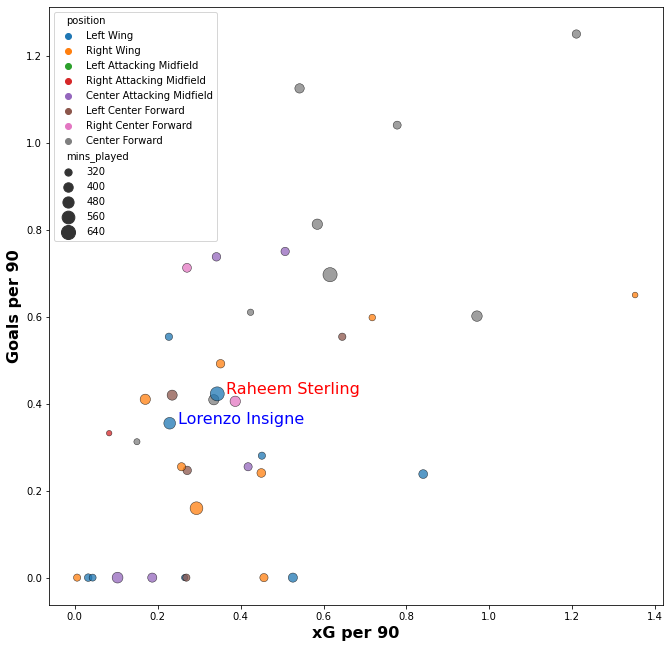

In [142]:
roles_order = ['Left Wing', 'Right Wing', 
               'Left Attacking Midfield', 'Right Attacking Midfield', 'Center Attacking Midfield',
               'Left Center Forward', 'Right Center Forward', 'Center Forward']

df = df[df['position'].isin(roles_order)] 

plt.figure(figsize = (11,11))

sns.scatterplot(data = df, x = 'shot_statsbomb_xg_p90', y = 'goal_p90', hue = 'position',  hue_order = roles_order, size = 'mins_played',sizes = (30,200), edgecolor = 'black', alpha = 0.75)

# Insigne
plt.annotate(df.loc[27, 'player'], xy = (df.loc[27, 'shot_statsbomb_xg_p90'] + 0.02, df.loc[27, 'goal_p90']), color='blue', alpha=1, size=16)

# Sterling
plt.annotate(df.loc[37, 'player'], xy = (df.loc[37, 'shot_statsbomb_xg_p90'] + 0.02, df.loc[37, 'goal_p90']), color='red', alpha=1, size=16)

plt.xlabel('xG per 90', fontsize = 16, weight = 'bold')
plt.ylabel('Goals per 90', fontsize = 16, weight = 'bold')

#plt.show()
plt.savefig("xg_Insigne_vs_Sterling.jpg", bbox_inches = 'tight')

## Shots on the pitch

In [158]:
shots.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_statsbomb_xg', 'shot_end_location', 'shot_outcome', 'shot_type',
       'shot_body_part', 'shot_technique', 'shot_freeze_frame',
       'possession_team_id', 'player_id', 'shot_key_pass_id',
       'shot_first_time', 'under_pressure', 'shot_aerial_won',
       'shot_one_on_one', 'shot_deflected', 'out', 'shot_saved_off_target',
       'shot_saved_to_post', 'shot_open_goal', 'shot_follows_dribble',
       'shot_redirect', 'off_camera'],
      dtype='object')

In [160]:
# Because StatsBomb delivers x/y coordinates in an array (e.g. [60.0, 40.0]), we need to split them into separate columns
location_columns = [x for x in shots.columns.values if 'location' in x]
for col in location_columns:
    for i, dimension in enumerate(["x", "y"]):
        new_col = col.replace("location", dimension)
        shots[new_col] = shots.apply(lambda x: x[col][i] if type(x[col]) == list else None, axis=1)
shots

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,shot_saved_off_target,shot_saved_to_post,shot_open_goal,shot_follows_dribble,shot_redirect,off_camera,x,y,shot_end_x,shot_end_y
0,91f2f8aa-4ee8-4593-97a6-1a7862a7cca5,50,1,00:00:29.166,0,29,Shot,4,Russia,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,99.9,48.2,103.3,46.6
1,0bb2daca-ab0b-497c-ac59-3cc559be6fb7,431,1,00:09:42.014,9,42,Shot,16,Russia,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,109.6,49.0,120.0,43.3
2,1215b0dc-81fb-4416-b9a6-0faf150a4e8d,856,1,00:19:53.988,19,53,Shot,37,Finland,From Goal Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,107.2,45.3,108.1,44.8
3,1ce72d1b-a7c5-4eb3-965f-61621b798f35,865,1,00:20:38.796,20,38,Shot,38,Finland,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,110.9,29.6,120.0,30.9
4,7aa54ce6-106a-4e26-9fb1-77aa0d76f793,1082,1,00:29:01.200,29,1,Shot,48,Russia,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,114.8,42.1,115.7,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,1d38ebb6-a02c-46d7-84c0-037d02c9c43f,2612,2,00:33:51.461,78,51,Shot,129,Wales,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,95.5,31.6,120.0,28.9
1285,49e47b32-f7c6-497b-8b36-89d116a3e00d,2658,2,00:35:14.850,80,14,Shot,132,Switzerland,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,99.4,48.8,111.5,40.8
1286,ed50056d-0dcf-4c4d-af1b-acbcfa42ec26,2692,2,00:36:45.145,81,45,Shot,135,Wales,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,94.9,40.8,96.5,40.7
1287,1fda187c-4b9e-4dbf-b9e1-6f12f03edb69,2837,2,00:43:16.732,88,16,Shot,141,Wales,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,104.5,32.4,105.9,33.1


### Lorenzo Insigne

In [161]:
event_Insigne = shots[shots['player']=='Lorenzo Insigne']

event_Insigne

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,shot_saved_off_target,shot_saved_to_post,shot_open_goal,shot_follows_dribble,shot_redirect,off_camera,x,y,shot_end_x,shot_end_y
76,74c503e0-990f-493e-aed2-a4424a74f891,1198,1,00:26:41.549,26,41,Shot,50,Italy,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,99.9,24.3,120.0,44.7
81,b5af4066-de71-4576-85fe-a3b570a93df7,1850,1,00:43:13.091,43,13,Shot,74,Italy,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,97.1,31.6,120.0,43.8
88,ef72add2-ff54-443a-9105-bcdf667c8582,2910,2,00:23:25.228,68,25,Shot,118,Italy,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,97.2,23.2,118.7,42.0
120,43cfe556-8ddb-4555-9b06-916fdc87cec0,209,1,00:07:04.491,7,4,Shot,12,Italy,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,54.7,120.0,42.4
121,86fd78d6-b940-4466-b784-63c027a314da,879,1,00:27:13.854,27,13,Shot,46,Italy,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,88.1,39.5,120.0,29.2
126,1217ace3-08bc-4e72-8c75-9d198d123515,2081,2,00:05:11.552,50,11,Shot,94,Italy,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,97.8,36.8,120.0,45.5
127,d9ebf773-edd5-4626-9708-3ba8fbc7d2c4,2179,2,00:07:37.695,52,37,Shot,99,Italy,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,105.8,23.8,120.0,56.8
130,17c2e87d-2979-43e6-9594-f32d7e5bb80e,2251,2,00:11:16.985,56,16,Shot,105,Italy,From Goal Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,117.9,29.8,119.2,36.2
262,d1465ed9-67ae-410e-874a-4a5b67631b23,709,1,00:13:33.160,13,33,Shot,28,Italy,From Counter,...,NaN,NaN,NaN,NaN,NaN,NaN,105.5,20.3,117.3,37.0
263,695dfc17-863a-42ec-a323-d8f57350023f,795,1,00:14:44.925,14,44,Shot,35,Italy,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,97.0,32.1,99.8,32.8


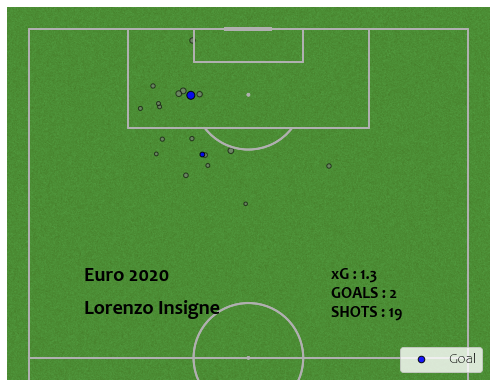

In [201]:
# create dashboard 
background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Candara'
mpl.rcParams['legend.fontsize'] = 15

# SETTING UP THE AXES
fig, ax1 = pitch.draw(figsize=(7,7))
#fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST SEASON
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='statsbomb',line_zorder=3,pitch_color='grass')
#ax_stats1 = fig.add_axes((0.01, 0.06, 0.4, 0.4))
#ax_stats1.patch.set_facecolor(background)
pitch.draw(ax=ax1)

#PLOTTING OTHER SHOTS
pitch.scatter(x = event_Insigne[event_Insigne['shot_outcome']!='Goal']['x'],
              y = event_Insigne[event_Insigne['shot_outcome']!='Goal']['y'], 
              s = np.sqrt(event_Insigne[event_Insigne['shot_outcome']!='Goal']['shot_statsbomb_xg'])*100, 
              marker = 'o', 
              alpha = 0.6,
              edgecolor = 'black',
              facecolor='grey', 
              ax=ax1)

#NOW PLOTTING THE GOALS
pitch.scatter(x = event_Insigne[event_Insigne['shot_outcome']=='Goal']['x'],
              y = event_Insigne[event_Insigne['shot_outcome']=='Goal']['y'], 
              s = np.sqrt(event_Insigne[event_Insigne['shot_outcome']=='Goal']['shot_statsbomb_xg'])*100, 
              marker = 'o', 
              alpha = 0.9,
              edgecolor = 'black', 
              facecolor='blue', 
              ax=ax1, 
              label='Goal')

# ADDING THE LEGEND
ax1.legend(loc='lower right').get_texts()[0].set_color("black")

ax1.text(55,74.5, f"xG : {round(sum(event_Insigne['shot_statsbomb_xg']),2)}", weight='bold', size=16)
ax1.text(55,71, 'GOALS : '+str(len(event_Insigne[event_Insigne['shot_outcome']=='Goal'])), weight='bold', size=16)
ax1.text(55,67.5, 'SHOTS : '+str(len(event_Insigne)), weight='bold', size=16)

ax1.text(10,74, 'Euro 2020', weight='bold', size=20)
ax1.text(10,68, 'Lorenzo Insigne', weight='bold', size=20)

#plt.show()
plt.savefig("Insigne_shots.jpg", bbox_inches = 'tight')

### Raheem Sterling

In [202]:
event_Sterling = shots[shots['player']=='Raheem Sterling']

event_Sterling

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,shot_saved_off_target,shot_saved_to_post,shot_open_goal,shot_follows_dribble,shot_redirect,off_camera,x,y,shot_end_x,shot_end_y
92,2ad830f5-8e50-468b-99d2-5acbec5d0ccc,582,1,00:12:12.180,12,12,Shot,20,England,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,105.6,31.2,118.0,37.4
98,d2c54416-ccd5-413b-a392-37c0b79816c1,1286,1,00:35:26.923,35,26,Shot,62,England,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,93.3,42.6,105.0,43.1
99,6977c2d5-793a-4128-a859-0fde86cfa23f,1362,1,00:37:31.321,37,31,Shot,66,England,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,111.1,39.4,116.1,40.4
105,f1cd3253-17a8-4717-8b09-eea5e39d889c,2534,2,00:28:09.535,73,9,Shot,121,England,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,111.8,42.5,113.1,42.4
114,b73448a1-a04b-4c2f-9eac-b4f54717a585,3695,3,00:07:44.282,97,44,Shot,171,England,From Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,102.2,35.9,120.0,51.2
118,78abd0af-af43-4914-95fe-3afa24d8b66d,4644,4,00:14:58.401,119,58,Shot,203,England,From Counter,...,NaN,NaN,NaN,NaN,NaN,NaN,117.3,48.7,118.4,44.2
156,0af9a049-abbb-4b5f-96d0-cb91040117f8,604,1,00:15:27.245,15,27,Shot,34,England,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,92.0,33.3,118.6,41.8
162,930999a8-c7af-451f-bb08-023fffbd419f,2966,2,00:29:45.907,74,45,Shot,158,England,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,114.1,38.9,120.0,40.9
351,ac6e1b26-807b-4776-9ba0-d91d18c88fe5,108,1,00:01:47.804,1,47,Shot,3,England,Regular Play,...,NaN,True,NaN,NaN,NaN,NaN,107.5,26.6,108.8,28.1
354,ad65ba79-2dc9-4541-8810-c4176a20e5ce,487,1,00:11:33.128,11,33,Shot,20,England,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,116.9,43.4,120.0,42.9


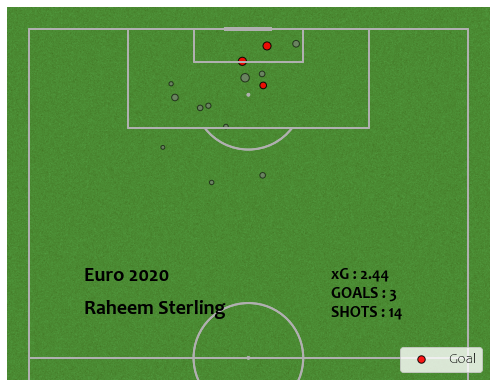

In [204]:
# create dashboard 
background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Candara'
mpl.rcParams['legend.fontsize'] = 15

# SETTING UP THE AXES
fig, ax2 = pitch.draw(figsize=(7,7))
#fig.set_facecolor(background)

#SETTING UP THE MPL AXIS FOR THE FIRST SEASON
pitch = mplsoccer.VerticalPitch(half=True,pitch_type='statsbomb',line_zorder=3,pitch_color='grass')
#ax_stats1 = fig.add_axes((0.01, 0.06, 0.4, 0.4))
#ax_stats1.patch.set_facecolor(background)
pitch.draw(ax=ax2)

#PLOTTING OTHER SHOTS
pitch.scatter(x = event_Sterling[event_Sterling['shot_outcome']!='Goal']['x'],
              y = event_Sterling[event_Sterling['shot_outcome']!='Goal']['y'], 
              s = np.sqrt(event_Sterling[event_Sterling['shot_outcome']!='Goal']['shot_statsbomb_xg'])*100, 
              marker = 'o', 
              alpha = 0.6,
              edgecolor = 'black',
              facecolor='grey', 
              ax=ax2)

#NOW PLOTTING THE GOALS
pitch.scatter(x = event_Sterling[event_Sterling['shot_outcome']=='Goal']['x'],
              y = event_Sterling[event_Sterling['shot_outcome']=='Goal']['y'], 
              s = np.sqrt(event_Sterling[event_Sterling['shot_outcome']=='Goal']['shot_statsbomb_xg'])*100, 
              marker = 'o', 
              alpha = 0.9,
              edgecolor = 'black', 
              facecolor='red', 
              ax=ax2, 
              label='Goal')

# ADDING THE LEGEND
ax2.legend(loc='lower right').get_texts()[0].set_color("black")

ax2.text(55,74.5, f"xG : {round(sum(event_Sterling['shot_statsbomb_xg']),2)}", weight='bold', size=16)
ax2.text(55,71, 'GOALS : '+str(len(event_Sterling[event_Sterling['shot_outcome']=='Goal'])), weight='bold', size=16)
ax2.text(55,67.5, 'SHOTS : '+str(len(event_Sterling)), weight='bold', size=16)

ax2.text(10,74, 'Euro 2020', weight='bold', size=20)
ax2.text(10,68, 'Raheem Sterling', weight='bold', size=20)

#plt.show()
plt.savefig("Sterling_shots.jpg", bbox_inches = 'tight')